In [29]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [30]:
train_dir = 'train'
test_dir = 'test'

In [31]:
files_train = os.listdir(train_dir)
files_test = os.listdir(test_dir)

In [32]:
labels = ['alef', 'beh', 'teh', 'theh', 'jeem', 'hah', 'khah', 'dal', 'thal',
                'reh', 'zain', 'seen', 'sheen', 'sad', 'dad', 'tah', 'zah', 'ain', 
                'ghain', 'feh', 'qaf', 'kaf', 'lam', 'meem', 'noon', 'heh', 'waw', 'yeh']

In [33]:
def extract_label(filename):
    for label in labels:
        if filename.startswith(label):
            return label
    return 'Unknown'  

In [34]:
train_data = pd.DataFrame({
    'Filename': files_train,
    'Label': [extract_label(f) for f in files_train]
})

In [35]:
train_data

,Filename,Label
0,ain10216.jpg,ain
1,ain10217.jpg,ain
2,ain10218.jpg,ain
3,ain10219.jpg,ain
4,ain10220.jpg,ain
...,...,...
13435,zain9939.jpg,zain
13436,zain9940.jpg,zain
13437,zain9941.jpg,zain
13438,zain9942.jpg,zain


In [36]:
#train_data.to_csv("DatasetImages_Train.csv", index=False)

In [37]:
test_data = pd.DataFrame({
    'Filename': files_test,
    'Label': [extract_label(f) for f in files_test]
})

In [38]:
test_data

,Filename,Label
0,ain1042.jpg,ain
1,ain1043.jpg,ain
2,ain1098.jpg,ain
3,ain1099.jpg,ain
4,ain1154.jpg,ain
...,...,...
3355,zain861.jpg,zain
3356,zain916.jpg,zain
3357,zain917.jpg,zain
3358,zain972.jpg,zain


In [39]:
#test_data.to_csv("DatasetImages_Test.csv", index=False)

In [40]:
train_data = pd.read_csv("DatasetImages_Train.csv")
test_data = pd.read_csv("DatasetImages_Test.csv")

In [41]:
unique_labels_count = train_data["Label"].nunique()
print("Number of unique labels:", unique_labels_count)

Number of unique labels: 28


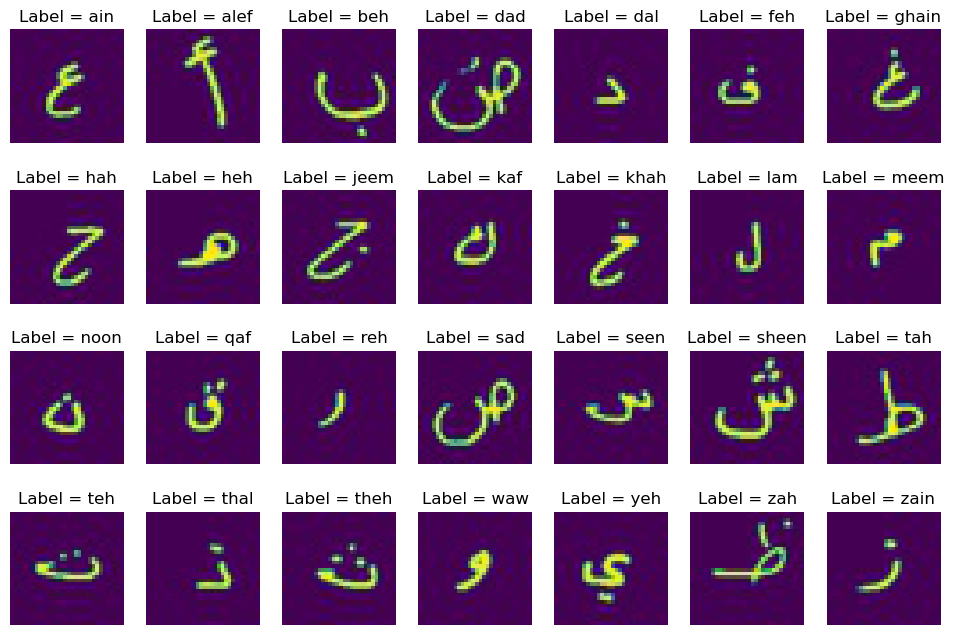

In [42]:
img_key_value = {}
train_images = [os.path.join(train_dir, i) for i in os.listdir(train_dir)] 
for value in train_data['Label'].unique():
    img_key_value[value] = train_data[train_data['Label']==value].index[0]
    
img_index = list(img_key_value.values())
img_label = list(img_key_value.keys())

fig, ax = plt.subplots(4, 7, figsize=(12, 8))

i = 0
for row in range(4):
    for col in range(7):
        plt.sca(ax[row, col])
        plt.title(f'Label = {img_label[i]}')
        img = plt.imread(train_images[img_index[i]])
        plt.imshow(img)
        plt.axis('off')
        i += 1
plt.show()


In [43]:

# Image size
img_size = (32, 32)

# Function to load and preprocess image
def load_image(file_path):
    img = Image.open(file_path)
    img = img.resize(img_size)
    img = np.array(img) / 255.0  # Normalize pixel values
    return img


In [44]:

# Load and preprocess training images and labels
X_train = []
y_train = []

for index, row in train_data.iterrows():
    img = load_image(os.path.join(train_dir, row['Filename']))
    X_train.append(img)
    y_train.append(row['Label'])

X_train = np.array(X_train)
y_train = np.array(y_train)


In [45]:

# Load and preprocess test images and labels
X_test = []
y_test = []

for index, row in test_data.iterrows():
    img = load_image(os.path.join(test_dir, row['Filename']))
    X_test.append(img)
    y_test.append(row['Label'])

X_test = np.array(X_test)
y_test = np.array(y_test)


In [46]:

# Shuffle training data
X_train, y_train = shuffle(X_train, y_train, random_state=42)


In [47]:

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [48]:

# Model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])


c:\Users\rkhm3\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [49]:

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [50]:

# Train the model
history = model.fit(
    X_train, y_train_encoded,
    epochs=20,
    validation_split=0.2,
    callbacks=[early_stopping]
)


Epoch 1/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.1431 - loss: 2.9268 - val_accuracy: 0.6261 - val_loss: 1.1334
Epoch 2/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5480 - loss: 1.3129 - val_accuracy: 0.7861 - val_loss: 0.6617
Epoch 3/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7055 - loss: 0.8562 - val_accuracy: 0.8516 - val_loss: 0.5005
Epoch 4/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7684 - loss: 0.6796 - val_accuracy: 0.8795 - val_loss: 0.3732
Epoch 5/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8193 - loss: 0.5243 - val_accuracy: 0.8884 - val_loss: 0.3356
Epoch 6/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8501 - loss: 0.4267 - val_accuracy: 0.9077 - val_loss: 0.2976
Epoch 7/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8680 - loss: 0.3929 - val_accuracy: 0.9111 - val_loss: 0.2771
Epoch 8/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8916 - loss: 0.3234 - val_accuracy: 0.

In [51]:

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test_encoded)
print("Test accuracy:", test_acc)


105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9381 - loss: 0.2381
Test accuracy: 0.9303571581840515


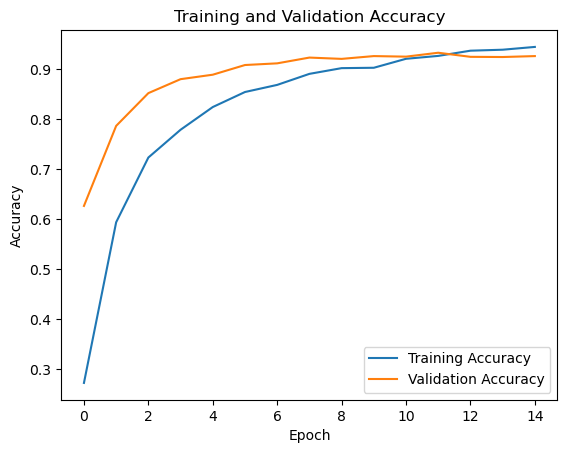

In [52]:


# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


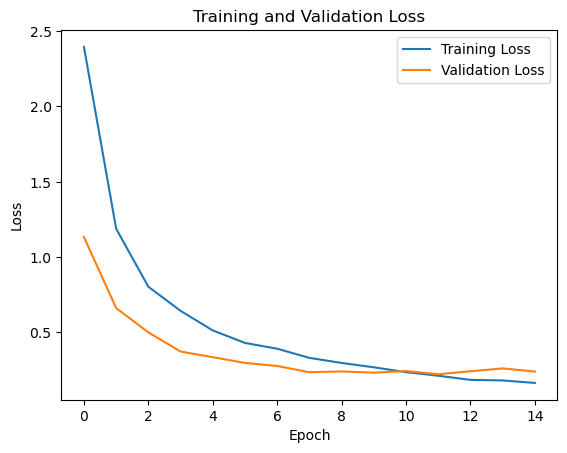

In [53]:

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


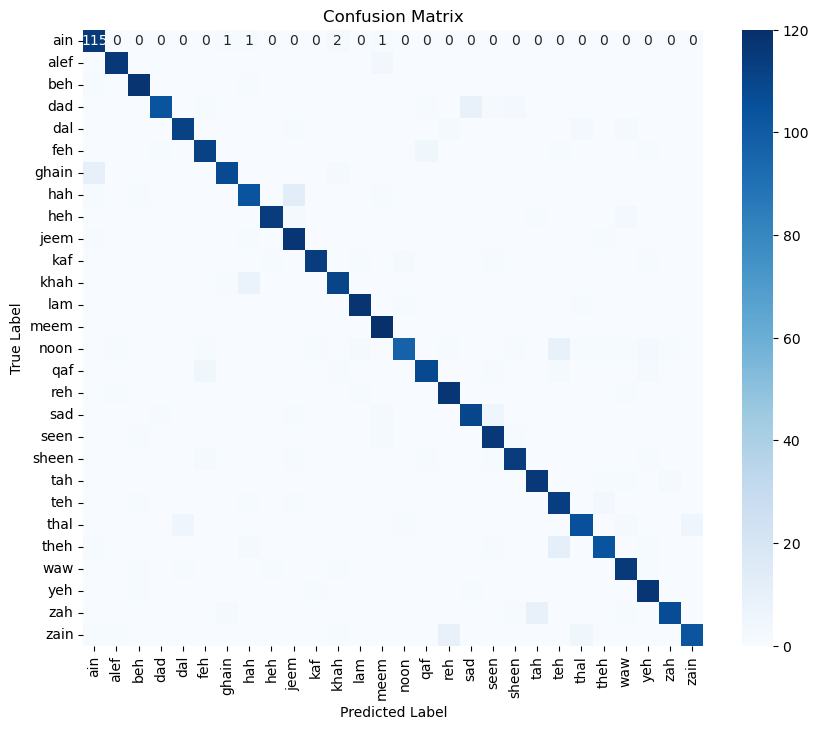

In [54]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test_encoded, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [57]:
# Compute true positives, false positives, and false negatives from the confusion matrix
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP

# Compute precision and recall
precision = TP / (TP + FP)
recall = TP / (TP + FN)

# Create a DataFrame to display precision and recall for each class
metrics_df = pd.DataFrame({'Class': label_encoder.classes_,
                           'Precision': precision,
                           'Recall': recall})

# Print the DataFrame
metrics_df


,Class,Precision,Recall
0,ain,0.884615,0.958333
1,alef,0.974790,0.966667
2,beh,0.959350,0.983333
3,dad,0.981132,0.866667
4,dal,0.941176,0.933333
5,feh,0.925620,0.933333
6,ghain,0.964286,0.900000
7,hah,0.881356,0.866667
8,heh,0.982759,0.950000
9,jeem,0.860294,0.975000
